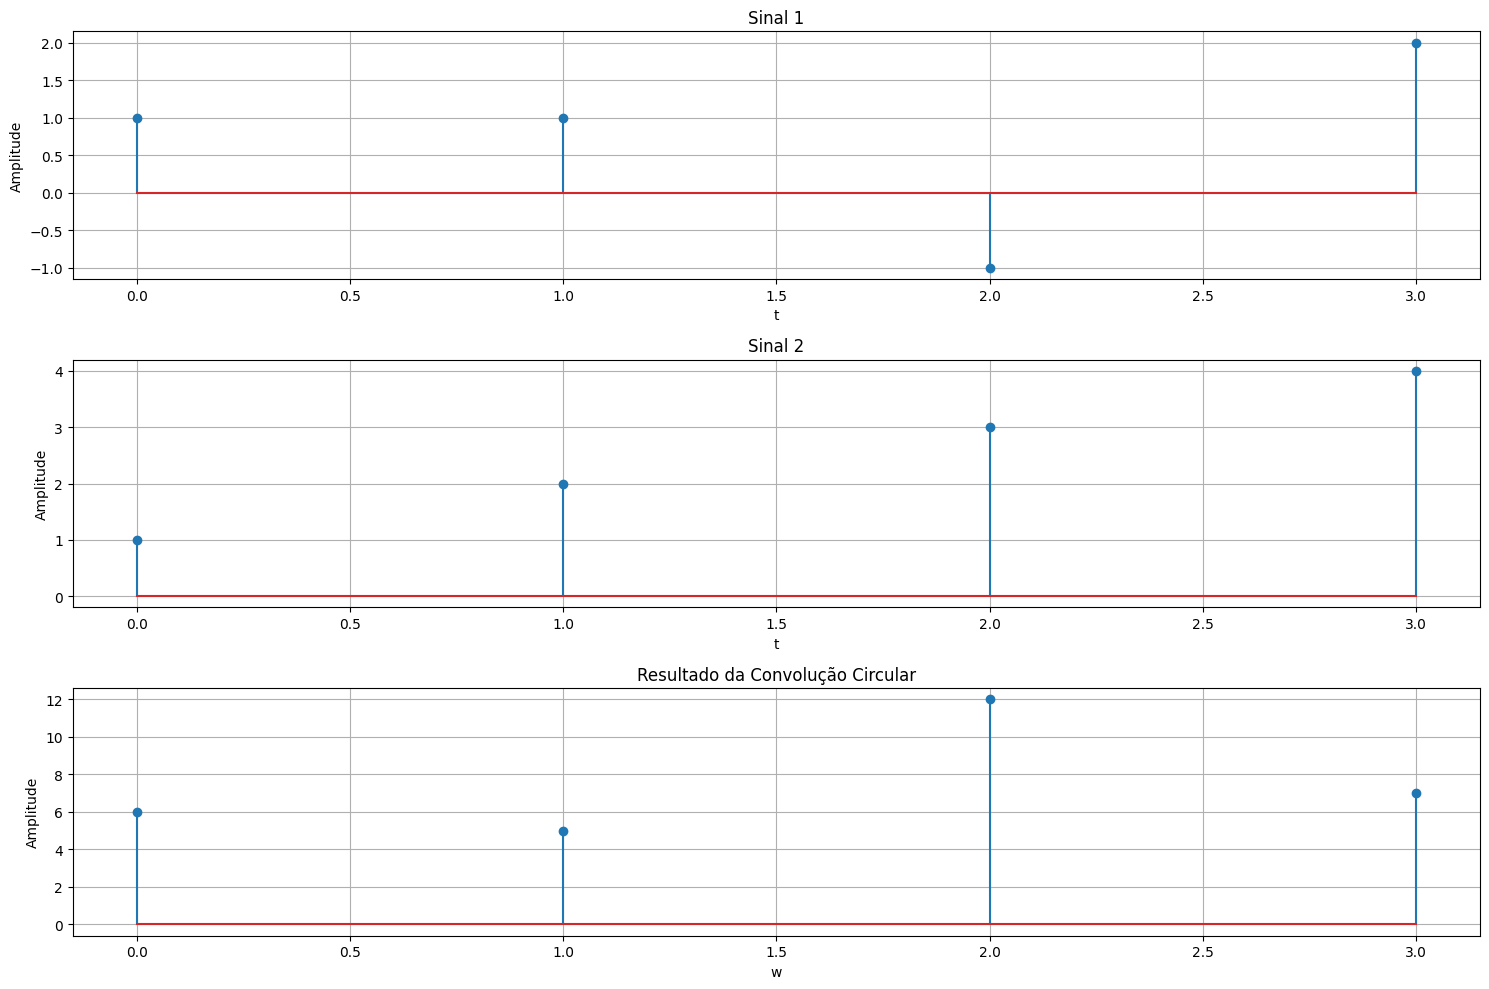

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def fft_recursiva(x):
    N = len(x)

    #garantir que o tamanho da entrada é uma potência de 2
    if N & (N - 1) != 0 and N > 0:
        raise ValueError("O tamanho da entrada (N) deve ser uma potência de 2.")

    #caso base
    if N == 1:
        return x

    #separa o sinal em parte par e ímpar.
    x_par = x[::2]
    x_impar = x[1::2]

    #chamada recursiva para cada metade do sinal.
    X_par = fft_recursiva(x_par)
    X_impar = fft_recursiva(x_impar)

    #calcula os fatores de torção (twiddle factors).
    twiddle_factors = np.exp(-2j * np.pi * np.arange(N) / N)

    # Combina os resultados usando a operação "butterfly".
    primeira_metade = X_par + twiddle_factors[:N//2] * X_impar
    segunda_metade = X_par + twiddle_factors[N//2:] * X_impar

    return np.concatenate([primeira_metade, segunda_metade])



#Código da Conv Circular
def convolucao_circular_fft(x, h):
    N = max(len(x), len(h))

    #buscando pela a próxima potência de 2 maior ou igual a N
    N_fft = 2**int(np.ceil(np.log2(N)))

    #preenchendo os sinais de entrada com zeros para ambos ter o mesmo tamanho
    sinal_x = np.pad(x, (0, N_fft - len(x)), 'constant')
    sinal_h = np.pad(h, (0, N_fft - len(h)), 'constant')

    #calculo da FFT de cada sinal
    X = fft_recursiva(sinal_x)
    H = fft_recursiva(sinal_h)

    #multiplicação no domínio da frequência
    Y = X * H

    #ajuste do fator de escala
    y = np.conj(fft_recursiva(np.conj(Y))) / N_fft

    return np.real(y)[:N]

#testando a convolução circular
sinal1 = np.array([1, 1, -1, 2])
sinal2 = np.array([1, 2, 3, 4])

resultado_convolucao = convolucao_circular_fft(sinal1, sinal2)

#plotando os sinais e o resultado da convolução
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.stem(sinal1)
plt.title('Sinal 1')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(sinal2)
plt.title('Sinal 2')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(resultado_convolucao)
plt.title('Resultado da Convolução Circular')
plt.xlabel('w')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()